**NOTE: Please use the tree image saved in the folder module 5. We are explaining everything using that image only.**

## Importing the required libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np

## Read and display the sample dataset

In [2]:
data = pd.read_csv("synergix_sample_data.csv")
data.head(30)

,Segment,Num_of_Promotions,Units_sold>1000
0,1,0.0,0
1,0,0.0,0
2,2,0.0,0
3,2,0.0,0
4,2,0.0,0
5,1,0.0,0
6,1,0.0,0
7,2,0.0,0
8,2,0.0,0
9,1,0.0,0


In [3]:
data.shape

(30, 3)

## Creating dependent and independent variables

In [4]:
# Features
X = data.drop(labels = ['Units_sold>1000'],axis=1)

In [5]:
#Target variable
y = data ['Units_sold>1000']


## Model building

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
DT_model = DecisionTreeClassifier(criterion = 'gini',  random_state = 42)

# Train the model
DT_model.fit(X,y)

DecisionTreeClassifier(random_state=42)

## Tree visualization

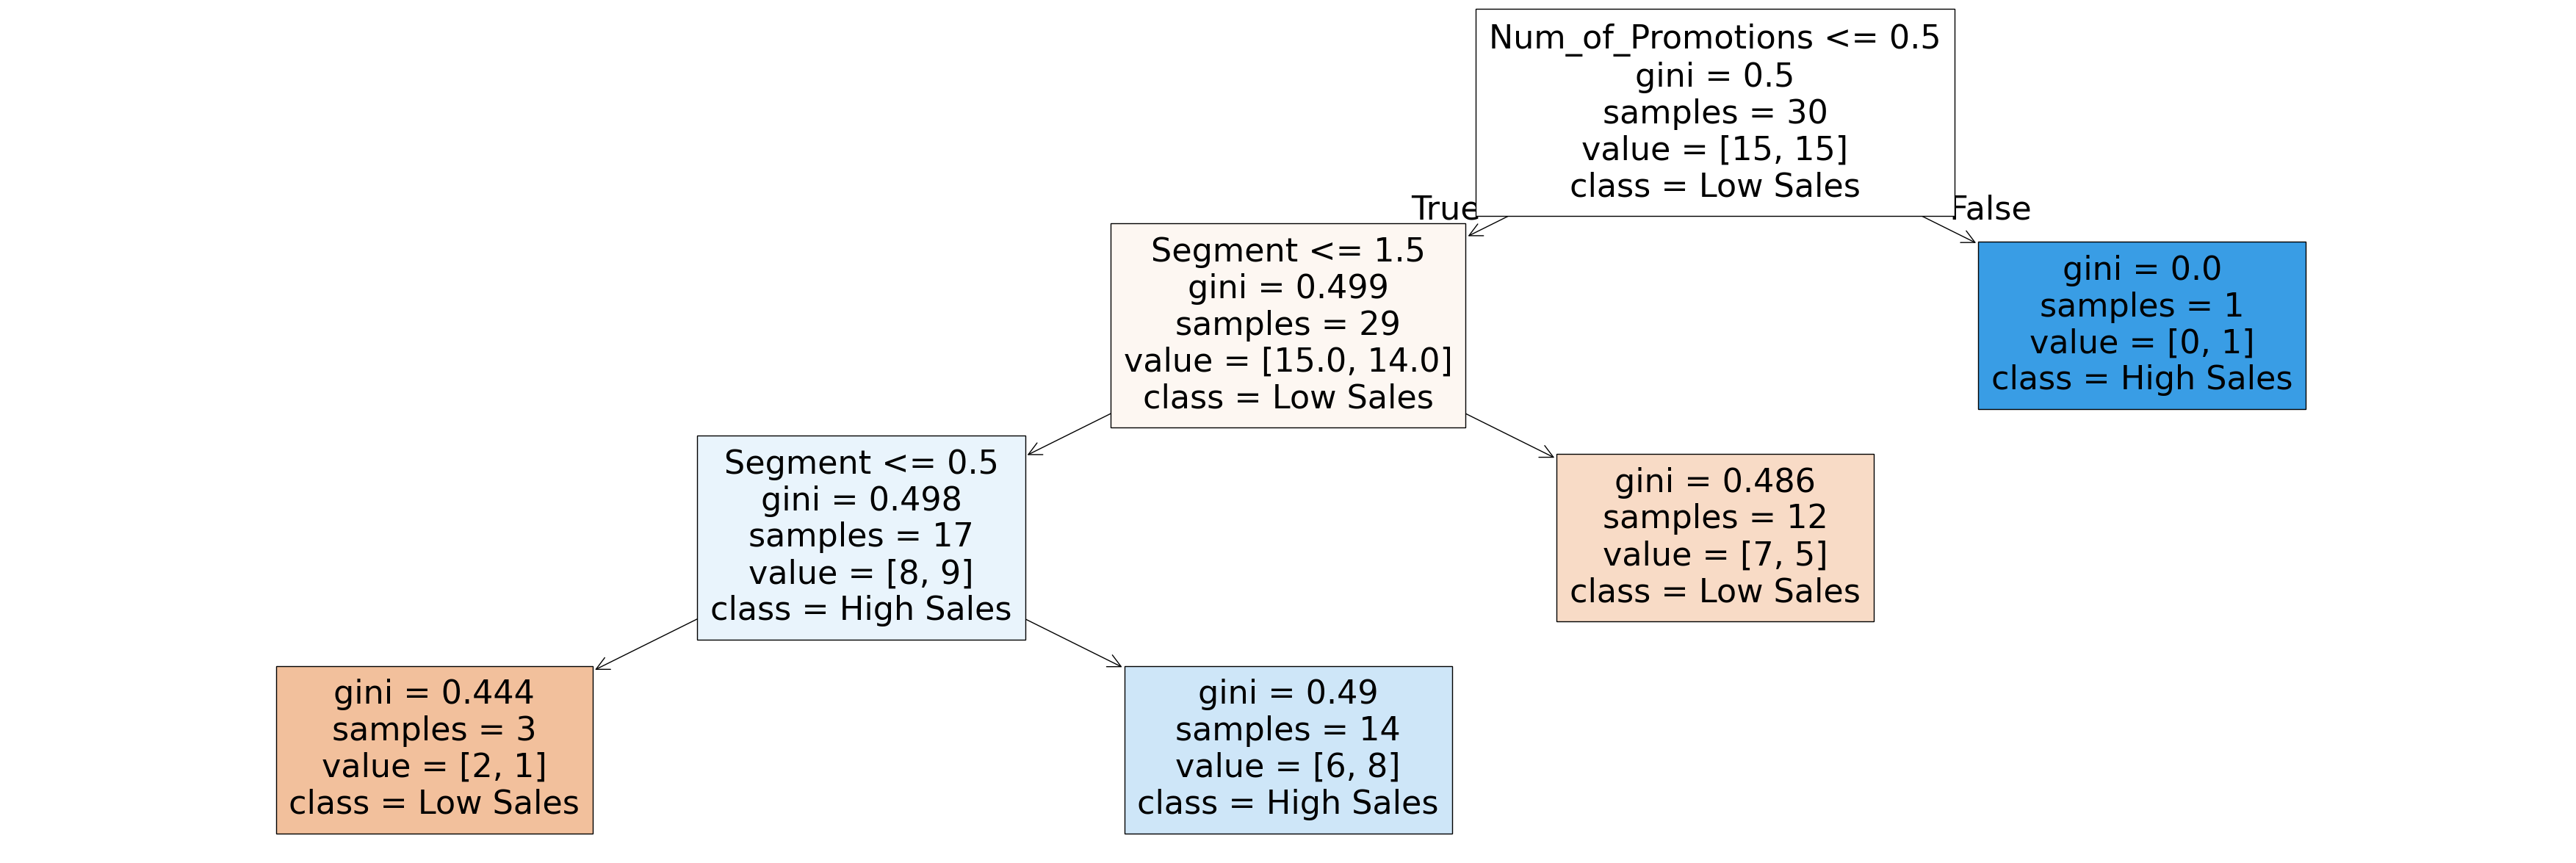

In [7]:
from matplotlib import pyplot as plt

# Visualizing the decision tree
from sklearn import tree
fig = plt.figure(figsize=(45,15))
features = X.columns
_ = tree.plot_tree(DT_model, 
                   feature_names=features,  
                   class_names=['Low Sales', 'High Sales'],
                   filled=True)


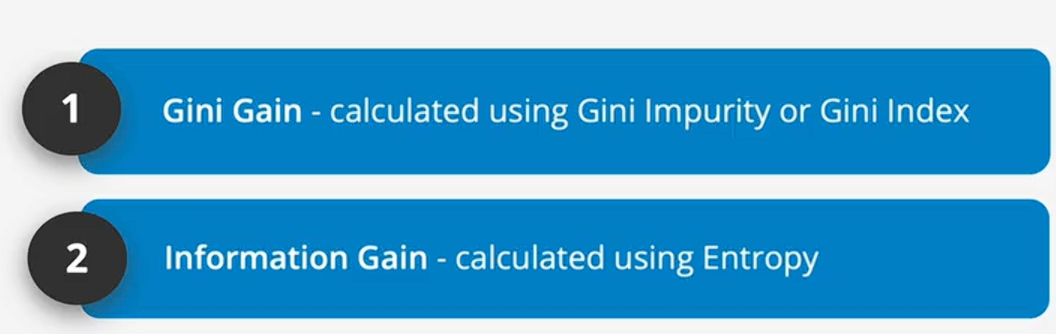

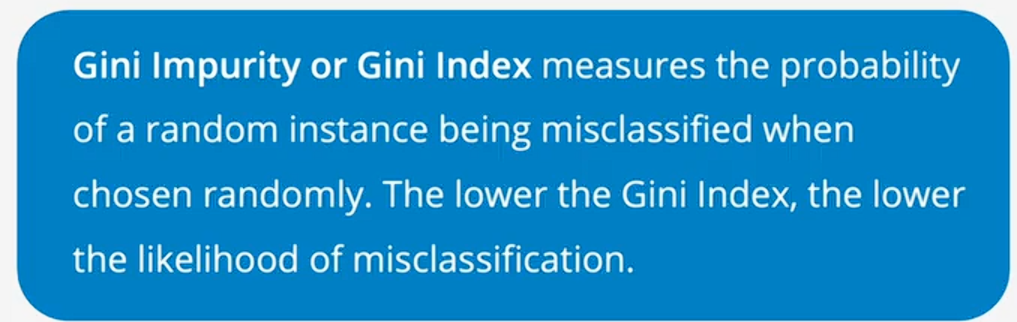

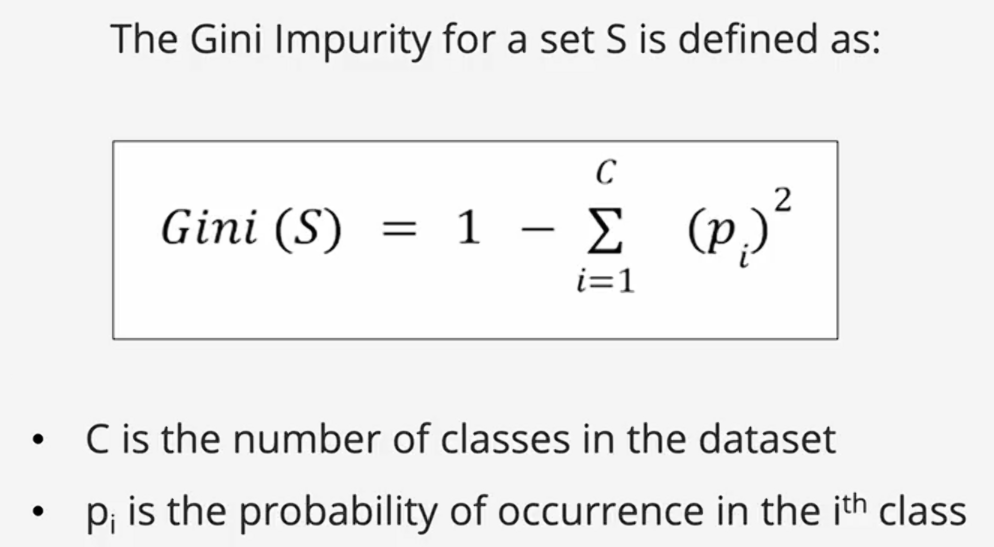

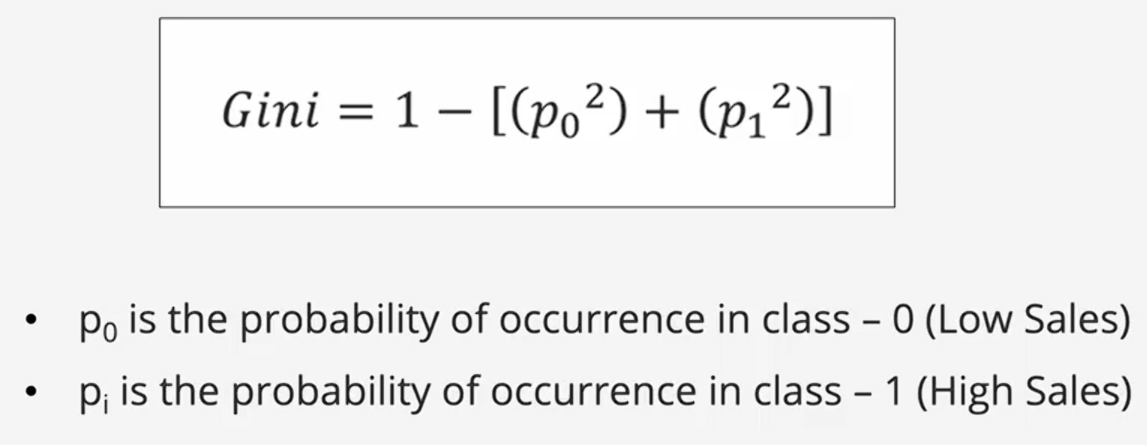

THIS TREE NEEDS TO BE REFERRED ALL THE TIME TILL VIDEO 4.

## Defining function to calculate the Gini Impurity

In [8]:
# Function that calculates the Gini Impurity and returns the value rounded to three decimal places

def gini(num_Class_0, num_Class_1): # num_Class_0 represents num of observations in class 0, etc.
    p_class_0 = num_Class_0/(num_Class_0+num_Class_1)
    p_class_1 = num_Class_1/(num_Class_0+num_Class_1)
    gini = 1-(p_class_0**2 + p_class_1**2)
    return np.round(gini, 3)

## Gini Impurity of root node

In [11]:
gini_root = gini(15,15)
gini_root

0.5

## Gini Impurity of child nodes

In [12]:
gini_child_node1 = gini(10,14)
gini_child_node1

0.486

In [13]:
gini_child_node2 = gini(5,1)
gini_child_node2

0.278

## Gini Impurity of a leaf node

In [14]:
gini_branch_node1 = gini(2,0)
gini_branch_node1

0.0

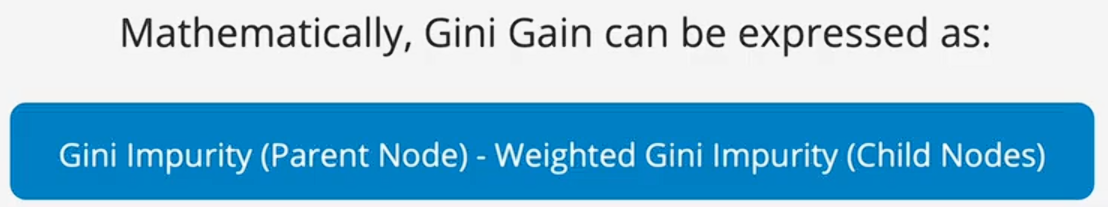

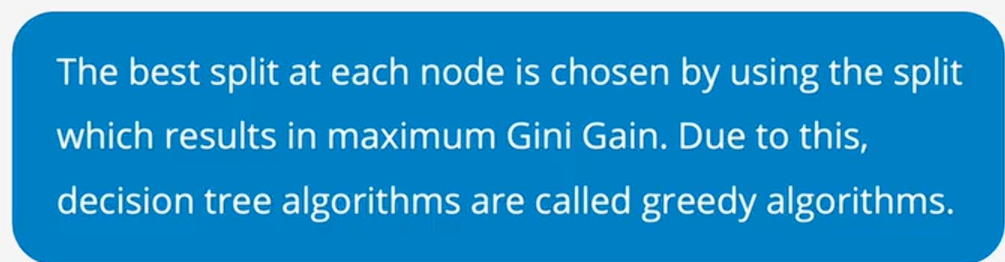

### Example

In [9]:
gini_root = gini(40,20)
gini_child_node1 = gini(20,10)
gini_child_node2 = gini(10,20)
print(gini_root)
print(gini_child_node1)
print(gini_child_node2)

0.444
0.444
0.444


## Calculate the weighted Gini Impurity

Weighted Gini Impurity
= (Total no of samples in the first child node /Total no of samples in the parent node) x Gini Impurity of the first child node + (Total no of samples in the second child node/ Total no of samples in the parent node) x  Gini Impurity of the second child node

In [15]:
# Calculate the weighted Gini Impurity
weighted_Gini = ((24/30) * (0.486)) + ((6/30)*(0.278)) 
np.round(weighted_Gini, 3)

0.444

## Gini Gain

In [32]:
# GINI ROOT NODE - WEIGHTED GINI OF BRANCH NODES
0.5 - 0.444

0.055999999999999994

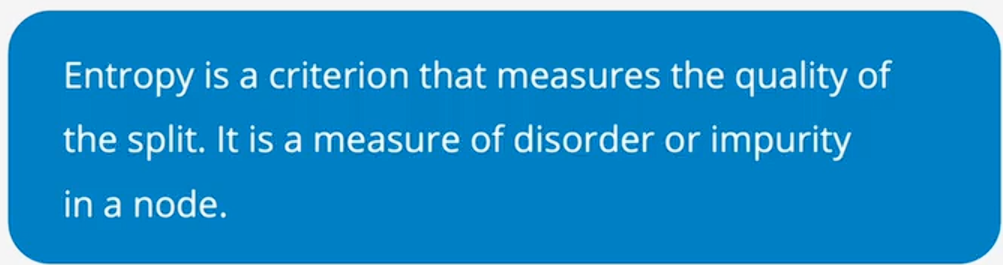

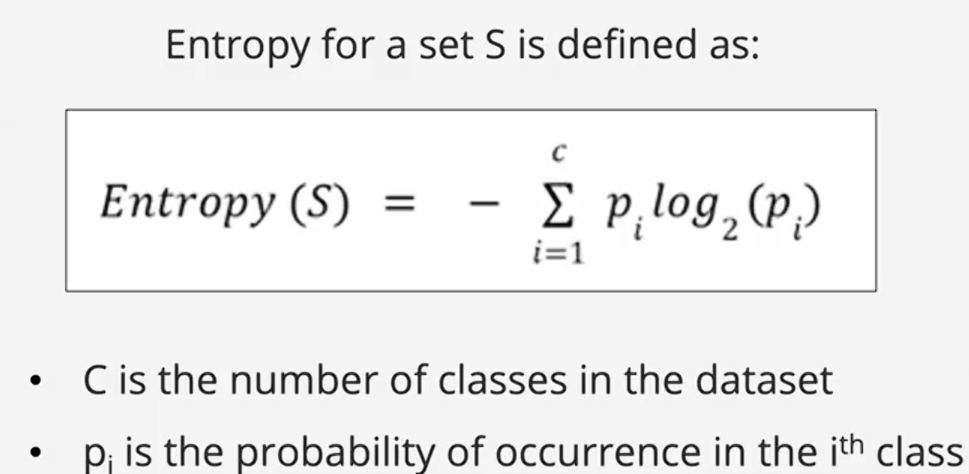

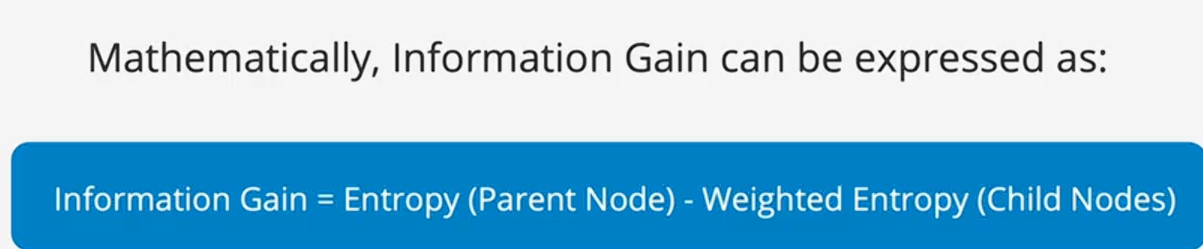